In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
np.set_printoptions(precision=4)

# Exercise 10:  model selection

* Select a dataset other than the breast cancer dataset and run nested cross validation to estimate the performance of a nonlinear SVM classifier, with grid search performed over the value of gamma and C.  
* Compare the accuracy you get with nested cross-validation with the performance you obtain with the default parameters.  What parameters are chosen when you train a GridSearchCV object?  
* In my experience, you can usually get performance which is similar by performing search only on the value of gamma.  Does that pan out for the dataset you have chosen?

In [8]:
qsar_data = pd.read_csv('biodeg.csv', sep=';')

X = qsar_data.iloc[:, :-1]
y = qsar_data.iloc[:, -1]

svm = SVC(kernel='rbf')

parameters = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100]}

outer_cv = KFold(n_splits=5, shuffle=True)
inner_cv = KFold(n_splits=3, shuffle=True)

nested_grid_search = GridSearchCV(svm, parameters, cv=inner_cv)
nested_score = cross_val_score(nested_grid_search, X=X, y=y, cv=outer_cv)
print("Nested Cross-Validation Accuracy:", nested_score.mean())

Nested Cross-Validation Accuracy: 0.8348995712028886


In [9]:
default_svm = SVC(kernel='rbf')

default_score = cross_val_score(default_svm, X=X, y=y, cv=outer_cv)
print("Default SVM Accuracy:", default_score.mean())

nested_grid_search.fit(X, y)
print("Best parameters found by GridSearchCV:", nested_grid_search.best_params_)

Default SVM Accuracy: 0.8159738208079441
Best parameters found by GridSearchCV: {'C': 1, 'gamma': 0.1}


In [10]:
gamma_parameters = {'gamma': [0.1, 1, 10, 100]}

gamma_nested_grid_search = GridSearchCV(svm, gamma_parameters, cv=inner_cv)
gamma_nested_score = cross_val_score(gamma_nested_grid_search, X=X, y=y, cv=outer_cv)
print("Gamma-Only Nested Cross-Validation Accuracy:", gamma_nested_score.mean())

Gamma-Only Nested Cross-Validation Accuracy: 0.8282915820356578


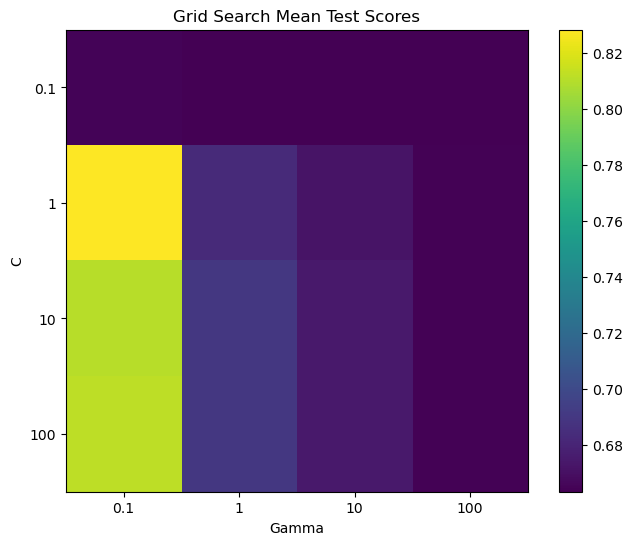

In [11]:
results = nested_grid_search.cv_results_
mean_scores = results['mean_test_score'].reshape(len(parameters['C']), len(parameters['gamma']))

plt.figure(figsize=(8, 6))
plt.imshow(mean_scores, cmap='viridis', interpolation='nearest')
plt.colorbar()

plt.xticks(np.arange(len(parameters['gamma'])), parameters['gamma'])
plt.yticks(np.arange(len(parameters['C'])), parameters['C'])

plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Grid Search Mean Test Scores')
plt.show()

This heatmap illustrates the performance of the SVM model across different combinations of gamma and C values. The brighter the color the higher performance and accuracy that the combination had.